## This notebook is to generate fasta files to search for consensus sequences in the indentified carboxylic acid responsive TCSs.

- Goal 1: Find RRs in carboxylic acid responsive subcluster across proteobacteria
- Goal 2: Divide subcluster into GerE and AAA and right fasta files
- Goal 3: Generate consensus files for GerE and AAA fastas

In [1]:
import pandas as pd
import numpy as np
import Bio.SeqIO as SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [213]:
ls SampledTCS/

TCSPlaygound_AcetobacterDB_1.csv
TCSPlaygound_Acetobacter_PPDB_1.csv
TCSPlaygound_ActinobacteriaDB_2.csv
TCSPlaygound_ActinobacteriaDB.csv
TCSPlaygound_AlphaproteobacteriaDB_2.csv
TCSPlaygound_AlphaproteobacteriaDB_4.csv
TCSPlaygound_AlphaproteobacteriaDB.csv
TCSPlaygound_BacteriaDB_2.csv
TCSPlaygound_BacteriaDB_3.csv
TCSPlaygound_BacteriaDB.csv
TCSPlaygound_BacteroidetesDB_2.csv
TCSPlaygound_BacteroidetesDB.csv
TCSPlaygound_BartonellaDB_1.csv
TCSPlaygound_Bartonella_PPDB_1.csv
TCSPlaygound_BetaproteobacteriaDB_2.csv
TCSPlaygound_BetaproteobacteriaDB.csv
TCSPlaygound_BrevundimonasDB_1.csv
TCSPlaygound_Brevundimonas_PPDB_1.csv
TCSPlaygound_ChloroflexiDB_2.csv
TCSPlaygound_ChloroflexiDB.csv
TCSPlaygound_DeltaproteobacteriaDB_2.csv
TCSPlaygound_DeltaproteobacteriaDB.csv
TCSPlaygound_FirmicutesDB_2.csv
TCSPlaygound_FirmicutesDB.csv
TCSPlaygound_GammaproteobacteriaDB_2.csv
TCSPlaygound_GammaproteobacteriaDB.csv
TCSPlaygound_ParacoccusDB_1.csv
TCSPlaygound_Paracoccus_PPDB_1.csv
TCSPlaygound_

In [124]:
df = pd.read_csv("SampledTCS/TCSPlaygound_ProteobacteriaDB.csv")
df[df["TCStype"].isin(["HK", "RR"])].sort_values("stable_id")

,TCStype,aseq_id,domain_counts,domain_seq,env_from,env_to,gene_id,sequence,stable_id,version
381,RR,8LWkGRDA1AubSuzGYH492g,"{'RR': 1, 'Trans_reg_C': 1}",LVVEDEIKTAEYLQQGLSESGYVVDIVHNGVDALHLFNTNVYSLVL...,3,112,1098105,MRVLVVEDEIKTAEYLQQGLSESGYVVDIVHNGVDALHLFNTNVYS...,GCF_000007565.2-PP_0029,GCF_000007565.2
380,HK,BoHZ-LqfrwJDgV9bfWfjJQ,{'HK_CA': 1},LSQFSDDLAHELRAPLSNLMGKAQVALTRERSLSEYREVLESCTEE...,241,463,1098106,MRPFSLAAKLGLKVGLMSAALLLLFATFGYLMVGKALERNARADLE...,GCF_000007565.2-PP_0030,GCF_000007565.2
378,RR,LL7_ZQRZvNWIpNM6VW59YA,"{'RR': 1, 'Trans_reg_C': 1}",LVIEDEVKTAEYVRQGLTECGYVVDCVHTGSDGLFLAKQHEYELII...,3,113,1098122,MRILVIEDEVKTAEYVRQGLTECGYVVDCVHTGSDGLFLAKQHEYE...,GCF_000007565.2-PP_0047,GCF_000007565.2
377,HK,vEwNS7GYcG9KfogH_N4H7A,"{'PAS': 1, 'HAMP': 1, 'HK_CA': 1, 'KinB_sensor...",RSEFVLRASHELRTPVTGMHMAFGLLRERVKFPPEARENDLLETIG...,373,593,1098212,MKWPPMKLRTRLFLSISTLVTVALLGLLLGLVSMLQMATVQQRLVR...,GCF_000007565.2-PP_0132,GCF_000007565.2
376,RR,mYIyZNNGs3OuCxBuENjwYw,"{'RR': 1, 'HTH_8': 1, 'Sigma54_activat': 1}",LLVDDESAILRTFRYCLEDEGYSVATANSAAQAETLLQRQVFDLCF...,11,121,1098213,MESAQDNQGRILLVDDESAILRTFRYCLEDEGYSVATANSAAQAET...,GCF_000007565.2-PP_0133,GCF_000007565.2
...,...,...,...,...,...,...,...,...,...,...
715,RR,08VfjdCiEgsB1K1BSqLcHA,"{'RR': 1, 'GerE': 1}",LLADDHKIVREGLRRIIEESGEMTVVAEASDGNETIQKTLKFKPDV...,4,117,18880118,MIKVLLADDHKIVREGLRRIIEESGEMTVVAEASDGNETIQKTLKF...,GCF_900170035.1-MTBBW1_RS24050,GCF_900170035.1
714,RR,gZvauV1_zJY8UIgg5KqtcA,{'RR': 1},LIVDDDPNIRDYLVSLLEDNGYATCTANDVRDGLKIAKAEQPDLIT...,5,113,18880144,MMKKILIVDDDPNIRDYLVSLLEDNGYATCTANDVRDGLKIAKAEQ...,GCF_900170035.1-MTBBW1_RS24175,GCF_900170035.1
712,RR,0_4ObaUKoZCXimBUt1s21g,"{'RR': 1, 'SpoIIE': 1}",LAVDDHLMNLKLIEKSLSKEGYRVLCAPDGPKARELAITELPDLIL...,7,119,18880322,MKQPFTILAVDDHLMNLKLIEKSLSKEGYRVLCAPDGPKARELAIT...,GCF_900170035.1-MTBBW1_RS25060,GCF_900170035.1
710,RR,_LbUONrN-CcaNnB5wJlzHg,"{'RR': 1, 'Trans_reg_C': 1}",LIVDDEEDILELIKFNLHKEGYLVTTALTGEDAIKIVRKEKIDLMI...,6,118,18880371,MSKEHILIVDDEEDILELIKFNLHKEGYLVTTALTGEDAIKIVRKE...,GCF_900170035.1-MTBBW1_RS25305,GCF_900170035.1


In [125]:
df["gene_number"] = df["stable_id"].str.rsplit("_", expand = True)[2].str.replace("RS", "").str.replace("A", "").str.replace(r'[a-z]', "").astype("float")
df["gene_number"]

/tmp/ipykernel_30476/2897915568.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["gene_number"] = df["stable_id"].str.rsplit("_", expand = True)[2].str.replace("RS", "").str.replace("A", "").str.replace(r'[a-z]', "").astype("float")


0       6715.0
1       6540.0
2       6340.0
3       6335.0
4       6325.0
         ...  
1935     515.0
1936     130.0
1937     125.0
1938     120.0
1939     115.0
Name: gene_number, Length: 1940, dtype: float64

In [94]:
ls TSNE_output/

 TSNEAlphaproteobacteria_DB1.csv   TSNEDeltaproteobacteria_DB2.csv
 TSNEAlphaproteobacteria_DB2.csv   TSNEGammaproteobacteria_DB1
 TSNEAlphaproteobacteriaDB_4.csv   TSNEGammaproteobacteria_DB1.csv
 TSNEBacteriaDB_1.csv              TSNEGammaproteobacteria_DB2
 TSNEBacteriaDB_2.csv              TSNEGammaproteobacteria_DB2.csv
 TSNEBacteriaDB_3.csv              TSNEProteobacteriaDB_1.csv
 TSNEBetaproteobacteria_DB1       'TSNEProteobacteriaDB_1.csv)'
 TSNEBetaproteobacteria_DB1.csv    TSNEProteobacteriaDB_2.csv
 TSNEBetaproteobacteria_DB2        TSNEProteobacteriaDB_3.csv
 TSNEBetaproteobacteria_DB2.csv    TSNEPseudomonasDB_1.csv
 TSNEDeltaproteobacteria_DB1      'TSNEPseudomonasDB_1.csv)'
 TSNEDeltaproteobacteria_DB1.csv   TSNEPseudomonasDB_2.csv
 TSNEDeltaproteobacteria_DB2       TSNEPseudomonasDB_3.csv


In [126]:
df_TSNE = pd.read_csv("TSNE_output/TSNEProteobacteriaDB_1.csv")
df_TSNE.species.unique()

array(['SPV1', 'BMS', 'H607', 'BMY09', 'PP', 'DNO', 'A37Q', 'PA', 'SULBA',
       'SUDEN', 'K245', 'MTBBW1', 'BLU87', 'T370', 'D187', 'PAEH1',
       'G482', 'G471', 'BLW27', 'Rru', 'AWT76', 'AFE'], dtype=object)

In [68]:
def palette(source):
    order = ['no domain', 'Trans_reg_C', 'HTH_8', 'GerE', 'Sigma54_activat']
    colors = [ "#000000", "#e3ac2d","#de1c07","#0209d6","#de1c07"]
    
    orderedDomainPalette = dict(zip(order, colors))

    AllDomains =  source["DBD"].unique()
    n=len(AllDomains)*10
    greys= sns.color_palette("Greys",n_colors = n, desat=0)[int(n*.3):int(n*0.7)]
    AllDomainsPalette = dict()
    for i, domain in enumerate(AllDomains):
        if domain in order:
            AllDomainsPalette[domain] = orderedDomainPalette[domain]
        else:
            AllDomainsPalette[domain] = greys[i]
            
    
    
    
    return AllDomainsPalette

In [28]:
def pos_neg():
    return 1 if random.random() < 0.5 else -1
pos_neg()

1

/usr/local/share/jupyteruser/.virtualenvs/biopython_3.8-kHq-BLTU/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


,Unnamed: 0,gene_id,version,phylum,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
74,74,BMS_RS02130,GCF_000210915.2,Proteobacteria,Oligoflexia,Bacteriovoracales,Halobacteriovoraceae,Halobacteriovorax,Halobacteriovorax marinus,GerE,GCF_000210915.2-BMS_RS02130,BMS,-42.081127,-44.457410
88,88,H607_RS12010,GCF_000425565.1,Proteobacteria,Hydrogenophilalia,Hydrogenophilales,Hydrogenophilaceae,Tepidiphilus,Tepidiphilus margaritifer,GerE,GCF_000425565.1-H607_RS12010,H607,-36.213380,-43.425514
118,118,BMY09_RS15965,GCF_900111095.1,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,HTH_8,GCF_900111095.1-BMY09_RS15965,BMY09,-40.188690,-33.544780
127,127,BMY09_RS18025,GCF_900111095.1,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,HTH_8,GCF_900111095.1-BMY09_RS18025,BMY09,-41.527554,-33.047360
148,148,BMY09_RS11575,GCF_900111095.1,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,GerE,GCF_900111095.1-BMY09_RS11575,BMY09,-33.648770,-42.662457
153,153,BMY09_RS14200,GCF_900111095.1,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,HTH_8,GCF_900111095.1-BMY09_RS14200,BMY09,-41.239506,-38.045177
161,161,PP_5241,GCF_000007565.2,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas putida,GerE,GCF_000007565.2-PP_5241,PP,-32.994520,-46.327580
178,178,PP_3551,GCF_000007565.2,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas putida,GerE,GCF_000007565.2-PP_3551,PP,-32.556480,-43.487648
211,211,PP_1401,GCF_000007565.2,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas putida,HTH_8,GCF_000007565.2-PP_1401,PP,-41.633880,-33.892654
212,212,PP_1066,GCF_000007565.2,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas putida,HTH_8,GCF_000007565.2-PP_1066,PP,-38.083218,-32.866860


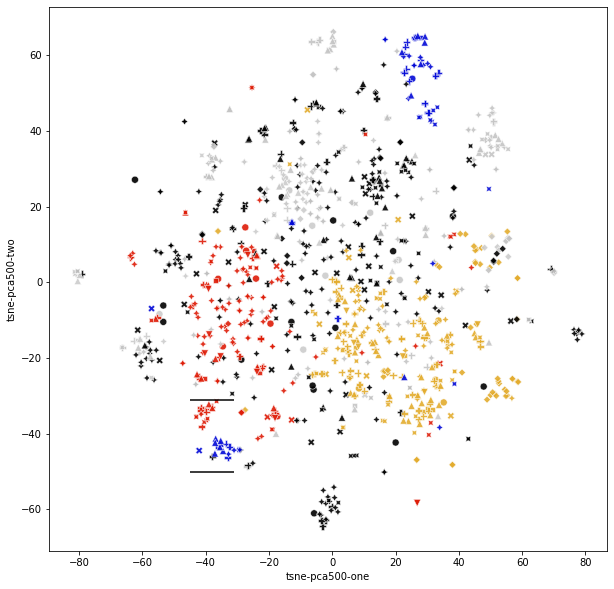

In [133]:
fig2, ax2  = plt.subplots(figsize =  (10,10))


source = df_TSNE
source["DBD"] = source["DBD"].fillna( "no domain")
source.dropna(how = "any", inplace= True)
# for ax, source in zip(axes, TSNEs):


subsource = source[(source["species"] == "PP") |
                   (source["class"]!="PP")
                  ]
sns.scatterplot(data =subsource, x ="tsne-pca500-one", y= "tsne-pca500-two",
                hue = "DBD",
                s = 50,
                style = "class",
                marker = "P",
                # hue_order= hue_order,
                legend = False,
                palette= palette(source),
                ax=ax2,
                alpha = 0.9
               )
TEXTS = []
for x,y,text in zip(subsource["tsne-pca500-one"], subsource["tsne-pca500-two"], subsource["id"]):
    # Only append selected countries
    text = text.split('-')[1]
    # if text in [ "PP_5241","PP_3551", "PP_1066", "PP_1401", "PP_0263" ]:
    #     TEXTS.append(ax2.annotate(text, xy=(x, y), xycoords='data',
    #                              fontsize=12,
    #                              xytext=(x+random.randrange(10)/100*pos_neg(), 
    #                                      y+random.randrange(10)/100*pos_neg()), 
    #                              textcoords='offset points',
    #                              arrowprops=dict(arrowstyle="-", color='grey', alpha=0.5)))


# #settings for alphaproteoDB4
#         use lines to define the boundary of the cluster
# ax2.hlines(y = 34,
#           xmin =-20,
#           xmax=-6.5, color = "k")
# ax2.hlines(y = 50,
#           xmin = -20,
#           xmax=-6.5, color = "k")
# # define the boundary of the cluster
# subcluster  =source[
#     (source["tsne-pca500-one"]>=-20) &
#     (source["tsne-pca500-one"]<=-6.5) &
#     (source["tsne-pca500-two"]>=34) &
#     (source["tsne-pca500-two"]<=50) #&
#     # (source["class"].str.contains("Alp"))
#           ]

#settings for proteoDB2

# use lines to define the boundary of the cluster
ax2.hlines(y = -31,
          xmin =-45,
          xmax=-31, color = "k")
ax2.hlines(y = -50,
           xmin =-45,
          xmax=-31, color = "k")
# # define the boundary of the cluster
subcluster  =source[
    (source["tsne-pca500-one"]>=-45) &
    (source["tsne-pca500-one"]<=-31) &
    (source["tsne-pca500-two"]>=-50) &
    (source["tsne-pca500-two"]<=-31) 
    # (source["class"].str.contains("Alp"))
          ]
subcluster
# # fig2.savefig(os.path.join("Figures", "Alphaproteobacteria_subcluster.png"))

In [214]:
df_RRs = pd.merge(df, subcluster, left_on = "stable_id", right_on = "id", suffixes = ("_HK", "_RR"))
df_RRs.head()

,TCStype,aseq_id,domain_counts,domain_seq,env_from,env_to,gene_id_HK,sequence,stable_id,version_HK,...,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
0,RR,wBvZ__nxxE-bFRANnz119w,"{'RR': 1, 'GerE': 1, 'PilZ': 1}",LVVEDNEVMCDVLATSIENLGMIVRKLTDAKEVLATLESERFDCVV...,94,204,7965226,MKKLDQKQIIENFADNFNLTPRETEIVGQLLKQMTSTKQISESLGI...,GCF_000210915.2-BMS_RS02130,GCF_000210915.2,...,Oligoflexia,Bacteriovoracales,Halobacteriovoraceae,Halobacteriovorax,Halobacteriovorax marinus,GerE,GCF_000210915.2-BMS_RS02130,BMS,-42.081127,-44.457410
1,RR,GbsFOB3SYCfABjdrdr4JdA,"{'RR': 1, 'GerE': 1}",HVVDDDEAMRDSLQWLLEGSGHHVRTYADAASFLATGGLSGSGCVL...,10,120,10190104,MNGTEKERLVHVVDDDEAMRDSLQWLLEGSGHHVRTYADAASFLAT...,GCF_000425565.1-H607_RS12010,GCF_000425565.1,...,Hydrogenophilalia,Hydrogenophilales,Hydrogenophilaceae,Tepidiphilus,Tepidiphilus margaritifer,GerE,GCF_000425565.1-H607_RS12010,H607,-36.213380,-43.425514
2,RR,fSfwPzIlQx837e8m797_qg,"{'RR': 1, 'HTH_8': 1, 'Sigma54_activat': 1}",LLVDDEKHIRLAAAQTLELAGYEVVCADSAEKALTLLDRDWPGVVV...,15,125,12963546,MNRETSAEQLQPHQILLVDDEKHIRLAAAQTLELAGYEVVCADSAE...,GCF_900111095.1-BMY09_RS15965,GCF_900111095.1,...,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,HTH_8,GCF_900111095.1-BMY09_RS15965,BMY09,-40.188690,-33.544780
3,RR,bZp5pPMof-JPmQ7f83YHcw,"{'RR': 1, 'HTH_8': 1, 'Sigma54_activat': 1}",LLVDDDPVIRQSTTLWLQMAGFGVIACDRAREALTHLNEQFPGVVV...,6,116,12962842,MNRGQVLLVDDDPVIRQSTTLWLQMAGFGVIACDRAREALTHLNEQ...,GCF_900111095.1-BMY09_RS18025,GCF_900111095.1,...,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,HTH_8,GCF_900111095.1-BMY09_RS18025,BMY09,-41.527554,-33.047360
4,RR,3J4zgjavS7gSHfodcuT5WQ,"{'RR': 1, 'GerE': 1}",FIVDDDDDFRDSMQWLLESDDLPVQSFSSARDFLSNYKGDKGCMLL...,8,117,12960671,MSRHNGTVFIVDDDDDFRDSMQWLLESDDLPVQSFSSARDFLSNYK...,GCF_900111095.1-BMY09_RS11575,GCF_900111095.1,...,Gammaproteobacteria,Oceanospirillales,Oceanospirillaceae,Amphritea,Amphritea atlantica,GerE,GCF_900111095.1-BMY09_RS11575,BMY09,-33.648770,-42.662457


In [2]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [135]:
records = []
RRs = []
for RR, dom_seq, RR_DBD in zip(df_RRs["stable_id"], df_RRs["domain_seq"],  df_RRs["DBD"] ):
    record = SeqRecord(Seq(dom_seq),
                   id=RR,
                   description=RR_DBD)
    RRs.append(record)

with open("subclusterRR_files/Proteobactiera_DB1_RRs.fasta", "w") as output_handle:
    SeqIO.write(RRs, output_handle, "fasta")
output_handle.close


<function TextIOWrapper.close()>

In [3]:
infile = f"subclusterRR_files/Alphaproteobactiera_DB2_RRs.fasta"
alignfile = f"subclusterRR_files/Alphaproteobactiera_DB2_RRs.afa"
!mafft-linsi {infile}>{alignfile}




outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.419
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   30 / 32
done.

Progressive alignment ... 
STEP    31 /31 
done.
tbfast (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

   30 / 32
Segment   1/  1    1- 119
STEP 002-030-1  identical.    identical.    identical.   
Converged.

done
dvtditr (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Probably mo

In [174]:
HK_GerE, HK_AAA = [], []
for seqrecord in SeqIO.parse(alignfile, "fasta"):
    if "GerE" in seqrecord.description or "no" in seqrecord.description:
        HK_GerE.append(seqrecord)
    elif "AAA" in  seqrecord.description or "HTH_8" in seqrecord.description or "Sigma" in  seqrecord.description:
        HK_AAA.append(seqrecord)

HK_GerE

[SeqRecord(seq=Seq('HIVDDDPAIRESLKGLLSDAGFNVDCYSSAEAFLNVRAP-------RRGCALID...RIQ'), id='GCF_000215955.2-SSPSH_RS07890', name='GCF_000215955.2-SSPSH_RS07890', description='GCF_000215955.2-SSPSH_RS07890 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('LVVDDDSSVRTALGRLLRSQDIPHHLFASAEALFEARLE--TP----CACLLLD...LLQ'), id='GCF_000007565.2-PP_5241', name='GCF_000007565.2-PP_5241', description='GCF_000007565.2-PP_5241 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('CIVDDDASVRKSLANLLRSAGFETLSFSAGHAFLASPLA--GE----AGCVLLD...VVE'), id='GCF_000007565.2-PP_5240', name='GCF_000007565.2-PP_5240', description='GCF_000007565.2-PP_5240 no domain', dbxrefs=[]),
 SeqRecord(seq=Seq('FIIDDDEAVRDSLKMLMKSVGQTVEAFSSPAEFLEVYDE--NR----PGCIVLD...LIN'), id='GCF_000710775.1-GV64_RS18380', name='GCF_000710775.1-GV64_RS18380', description='GCF_000710775.1-GV64_RS18380 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('FIVDDDASVRDSTALYLSLKGFQTQLFACGEDFLSAMPD--EP----VGCVLLD...AVN'), id='GCF_000271305.1-WQQ_RS05910', name='GCF_000271305.1-WQQ_RS0591

In [175]:
for domain, record in zip(["GerE", "AAA"], [HK_GerE, HK_AAA]):
    with open(f"subclusterRR_files/Alphaproteobactiera_DB2_RRs{domain}.fasta", "w") as output_handle:
        SeqIO.write(record, output_handle, "fasta")
    output_handle.close

In [165]:
!ls

Alignment_Files			   SampledTCS
Alphaproteobacteria_subcluster	   Search_Alphaproteobacteria.ipynb
BacterialGenomes_formalized.ipynb  Source_Files
cognateHK_files			   subclusterRR_files
cognateHKs.ipynb		   subclusterRRs.ipynb
Figures				   TCS_playground_Formalized.ipynb
GenomeDBs			   TCS_playground_Formalized-OFCFigures.ipynb
Genome_TCS_curation.ipynb	   TSNE_output
SampledGenomes


In [10]:
cat subclusterRR_files/*.afa > subclusterRR_files/all_afa.afa

In [11]:
!cat subclusterRR_files/all_afa.afa

>GCF_000354175.2-N646_RS17960 HTH_8
ALIEDDDIVRQATSQWLQLAGFD-VTAFSLGEEGKAAILS--QEFDAIVSDVRLPDTDGL
SILESLIANHIPTPVILITGHGDVDMAVGALQNGAFDFIEKPFQPERLSQRVT
>GCF_000354175.2-N646_RS15240 HTH_8
FFIDDEADLRLAIEQTFELADID-AKFFVDAESALIAMQQG-EEAGVVVTDICLPGISGM
DMLTTLTQRDANLPVIMITGHGDISMAVQALHQGAYDFIEKPFAPEHLVETVK
>GCF_000817975.1-Achr_RS19125 HTH_8
LLIDDDPHLRQALSQTLDLAGLK-VCALADARGLAERLDR--DWPGVVVSDIRMPGIDGL
ELLGQLKALDAELPVLLITGHGDVPLAVQAMRAGAYDFLEKPFASEDLLDSVR
>GCF_000817975.1-Achr_RS12945 HTH_8
LFIDDEAPIREAVQQWLELSGLS-VRTCARAEEALALLDA--DFPGVVVSDVRMPGMDGL
ALLERLKALDAELPVIMVTGHGDVPMAVAAMQQGAYDFIEKPFTPERLLGSLQ
>GCF_000739435.1-ASU1_RS05965 HTH_8
LLIDDDQDVLQAYQSLLELEGYR-TIAVNNPVTALEQISE--DWQGIVVSDIYMPQMSGW
QLLEQIHAKDKQLPVILITGHGDVPMAIEAMQKGAFYFIEKPVRPEKFLQQVA
>GCF_900108915.1-BMX05_RS07525 HTH_8
IVVDDEHHLRVTLRQTLELAGYQ-VLAYAQAQEALTHIGEVDEWPGVIISDIRMPKMDGL
AFLEALQHLDPDLPVILITGHGDISTAVAAMRQGAYDFLEKPFSQEILLDGVR
>GCF_000264765.2-ETEE_RS14930 HTH_8
LLIDDDPDVLDAYTLLLTQSGYT-VHACADPLQALAMIPD--DWPGVILSDVCMPGC

In [12]:
seen = []
records = []
for seqrecord in SeqIO.parse("subclusterRR_files/all_afa.afa", "fasta"):
    if str(seqrecord.seq) not in seen:
        seen.append(str(seqrecord.seq))
        records.append(seqrecord)
        
with open(f"subclusterRR_files/all_afa_clean.afa", "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")
output_handle.close

<function TextIOWrapper.close()>

In [13]:
!mafft-linsi subclusterRR_files/all_afa_clean.afa>subclusterRR_files/all_alna_afa.afa


outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.419
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  200 / 210
done.

Progressive alignment ... 
STEP   209 /209 
done.
tbfast (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  200 / 210
Segment   1/  1    1- 129
STEP 003-002-0  identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identic

In [14]:
seen = []
HK_GerE, HK_AAA = [], []
for seqrecord in SeqIO.parse("subclusterRR_files/all_alna_afa.afa", "fasta"):
    if str(seqrecord.seq) not in seen:
        seen.append(str(seqrecord.seq))
        if "GerE" in seqrecord.description:# or "no" in seqrecord.description:
            HK_GerE.append(seqrecord)
        elif "AAA" in  seqrecord.description or "HTH_8" in seqrecord.description or "Sigma" in  seqrecord.description:
            HK_AAA.append(seqrecord)

for domain, record in zip(["GerE", "AAA"], [HK_GerE, HK_AAA]):
    with open(f"subclusterRR_files/All_subclusterRRs{domain}.fasta", "w") as output_handle:
        SeqIO.write(record, output_handle, "fasta")
    output_handle.close

In [17]:
Alphas, Gammas = [], []

for clade in ["Alphaproteobacteria", "Gammaproteobacteria"]:
    # for DBD in ["AAA", "GerE"]:
    for seqrecord in SeqIO.parse(f"subclusterRR_files/All_subclusterRRs{domain}.fasta", "fasta"):
            

        infile = f"subclusterRR_files/{clade}_RRs.fasta"
        alignfile = f"subclusterRR_files/{clade}_RRs.afa"
        !mafft-linsi {infile}>{alignfile}


outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.419
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   50 / 57
done.

Progressive alignment ... 
STEP    56 /56 
done.
tbfast (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

   50 / 57
Segment   1/  1    1- 126
STEP 003-002-0  identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.   
Converged.

done
dvtditr (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, 

In [21]:
seen = []
HK_GerE, HK_AAA = [], []
for clade in [
    # "Alphaproteobacteria", 
    "Gammaproteobacteria"]:

    for seqrecord in SeqIO.parse(f"subclusterRR_files/{clade}_RRs.afa", "fasta"):
        if str(seqrecord.seq) not in seen:
            seen.append(str(seqrecord.seq))
            if "GerE" in seqrecord.description:# or "no" in seqrecord.description:
                HK_GerE.append(seqrecord)
            elif "AAA" in  seqrecord.description or "HTH_8" in seqrecord.description or "Sigma" in  seqrecord.description:
                HK_AAA.append(seqrecord)

    for domain, record in zip(["GerE", "AAA"], [HK_GerE, HK_AAA]):
        with open(f"subclusterRR_files/{clade}_{domain}.afa", "w") as output_handle:
            SeqIO.write(record, output_handle, "fasta")
        output_handle.close